In [1]:
%pip install openai requests pillow --quiet

Note: you may need to restart the kernel to use updated packages.


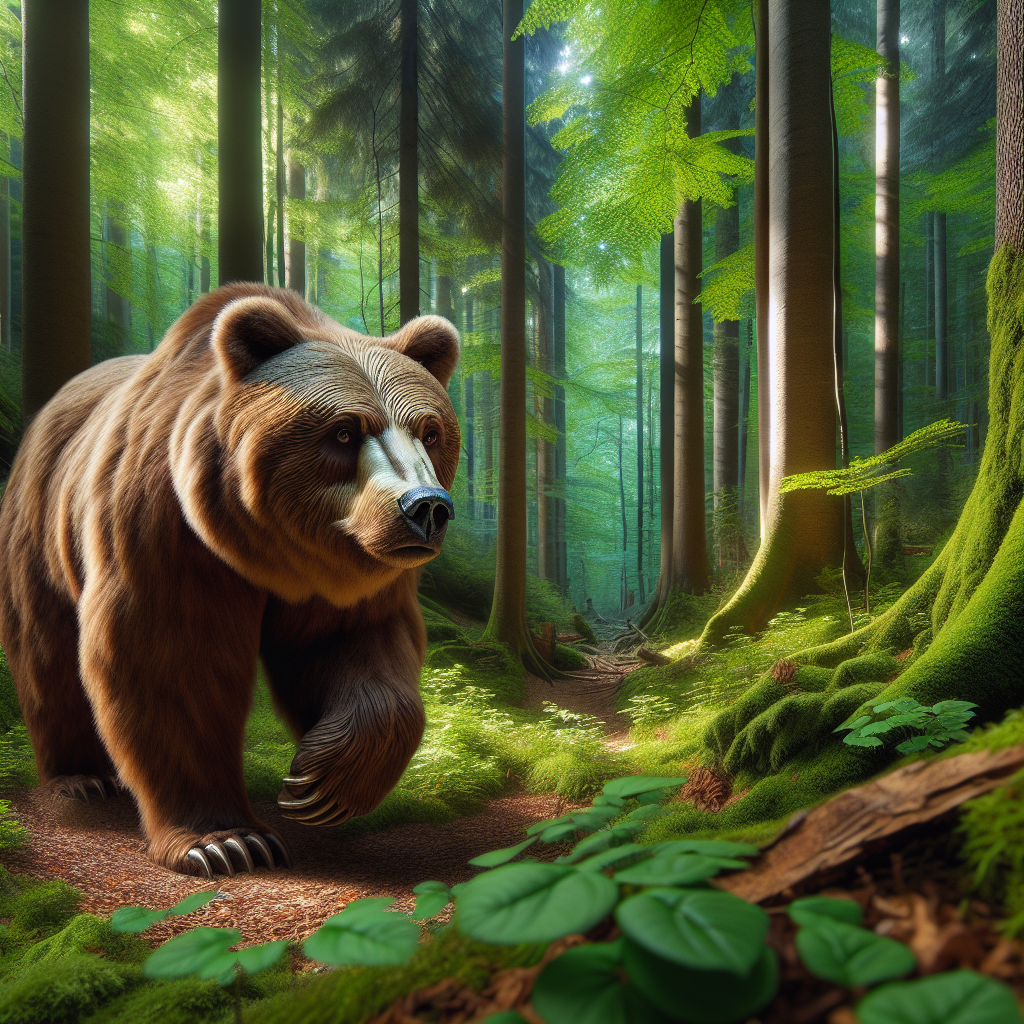

In [2]:
from openai import AzureOpenAI
import os
import requests
from PIL import Image
import json
from dotenv import load_dotenv
load_dotenv()

client = AzureOpenAI(
    api_version=os.getenv("OPENAI_API_VERSION"),
    api_key=os.getenv("AZURE_OPENAI_KEY"),  
    azure_endpoint = os.getenv("AZURE_OPENAI_ENDPOINT")
)

result = client.images.generate(
    model="dall-e-3", # the name of your DALL-E 3 deployment
    prompt="a close-up of a bear walking throughthe forest",
    n=1
)

json_response = json.loads(result.model_dump_json())

# Set the directory for the stored image
image_dir = os.path.join(os.curdir, 'images')

# If the directory doesn't exist, create it
if not os.path.isdir(image_dir):
    os.mkdir(image_dir)

# Initialize the image path (note the filetype should be png)
image_path = os.path.join(image_dir, 'generated_image.png')

# Retrieve the generated image
image_url = json_response["data"][0]["url"]  # extract image URL from response
generated_image = requests.get(image_url).content  # download the image
with open(image_path, "wb") as image_file:
    image_file.write(generated_image)

# Display the image in the default image viewer
image = Image.open(image_path)
image.show()